# Gray–Scott reaction–diffusion system

### How do variations in the feed and kill rates of a 2D Gray–Scott reaction–diffusion system influence the emergence, stability, and transitions between distinct spatial pattern regimes?

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [5]:
N = 100
DX = 1.0
DT = 1.0

D_U = 0.16
D_V = 0.08

N_STEPS = 5000

F_VALUES = np.linspace(0.02, 0.08, 10)
K_VALUES = np.linspace(0.04, 0.07, 10)


In [6]:
def initialize_grid():
    U = np.ones((N, N))
    V = np.zeros((N, N))

    r = 10
    center = N // 2
    U[center-r:center+r, center-r:center+r] = 0.5
    V[center-r:center+r, center-r:center+r] = 0.25

    return U, V


In [7]:
def laplacian(X):
    return (
        np.roll(X,  1, axis=0) +
        np.roll(X, -1, axis=0) +
        np.roll(X,  1, axis=1) +
        np.roll(X, -1, axis=1) -
        4 * X
    )


In [8]:
def update(U, V, F, k):
    Lu = laplacian(U)
    Lv = laplacian(V)

    reaction = U * V**2

    U_new = U + DT * (D_U * Lu - reaction + F * (1 - U))
    V_new = V + DT * (D_V * Lv + reaction - (F + k) * V)

    return U_new, V_new


In [9]:
def run_simulation(F, k):
    U, V = initialize_grid()

    for _ in range(N_STEPS):
        U, V = update(U, V, F, k)

    return V


In [10]:
def spatial_variance(V):
    return np.var(V)


In [11]:
pattern_map = np.zeros((len(F_VALUES), len(K_VALUES)))

for i, F in enumerate(F_VALUES):
    for j, k in enumerate(K_VALUES):
        V_final = run_simulation(F, k)
        pattern_map[i, j] = spatial_variance(V_final)


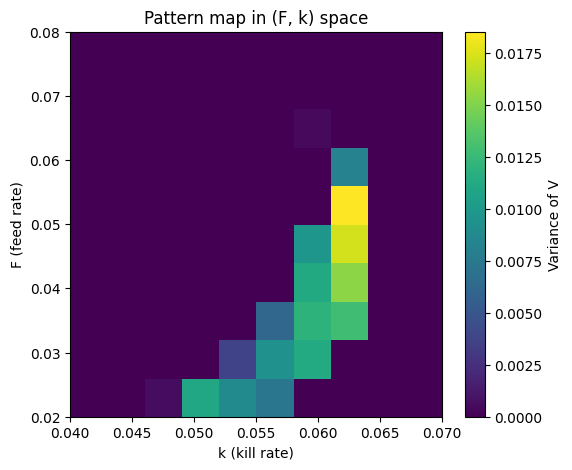

In [12]:
plt.figure(figsize=(6, 5))
plt.imshow(
    pattern_map,
    origin="lower",
    extent=[K_VALUES[0], K_VALUES[-1], F_VALUES[0], F_VALUES[-1]],
    aspect="auto"
)
plt.colorbar(label="Variance of V")
plt.xlabel("k (kill rate)")
plt.ylabel("F (feed rate)")
plt.title("Pattern map in (F, k) space")
plt.show()


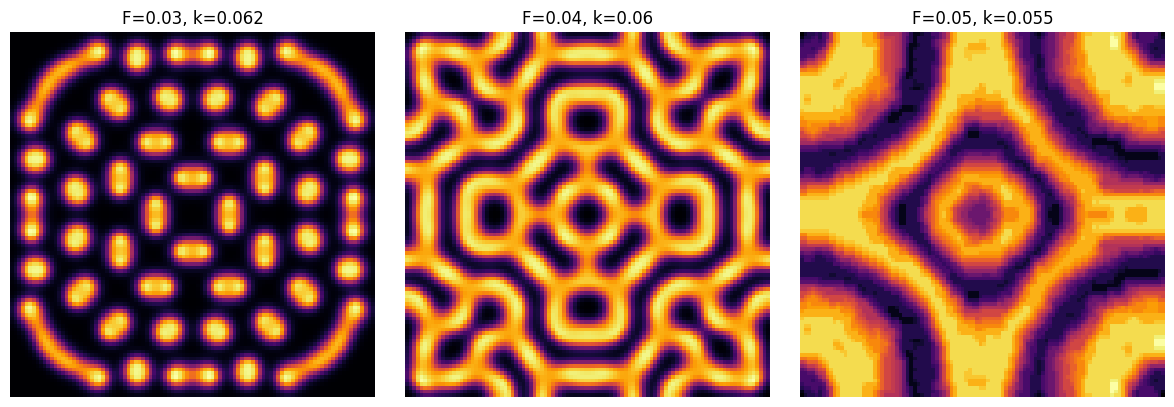

In [14]:
examples = [
    (0.03, 0.062),
    (0.04, 0.06),
    (0.05, 0.055)
]

plt.figure(figsize=(12, 4))

for i, (F, k) in enumerate(examples):
    V = run_simulation(F, k)
    plt.subplot(1, 3, i+1)
    plt.imshow(V, cmap="inferno")
    plt.title(f"F={F}, k={k}")
    plt.axis("off")

plt.tight_layout()
plt.show()
